In [2]:
import pandas as pd
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df['losses'] = df['losses'].str.replace('nan', 'None', regex=False).apply(eval)
df['accuracies'] = df['accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_simple = pd.read_csv('training_results_trad.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_simple['losses'] = df_simple['losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_simple['accuracies'] = df_simple['accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_combined = pd.read_csv('training_results_combined.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_combined['losses'] = df_combined['losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_combined['accuracies'] = df_combined['accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_combined_analoginference = pd.read_csv('training_results_combined_analoginference.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_combined_analoginference['losses'] = df_combined_analoginference['losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_combined_analoginference['accuracies'] = df_combined_analoginference['accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_combined_xnoisy = pd.read_csv('training_results_combined_xnoisy.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_combined_xnoisy['digital_losses'] = df_combined_xnoisy['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_combined_xnoisy['digital_accuracies'] = df_combined_xnoisy['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_combined_xnoisy['analog_losses'] = df_combined_xnoisy['analog_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_combined_xnoisy['analog_accuracies'] = df_combined_xnoisy['analog_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)



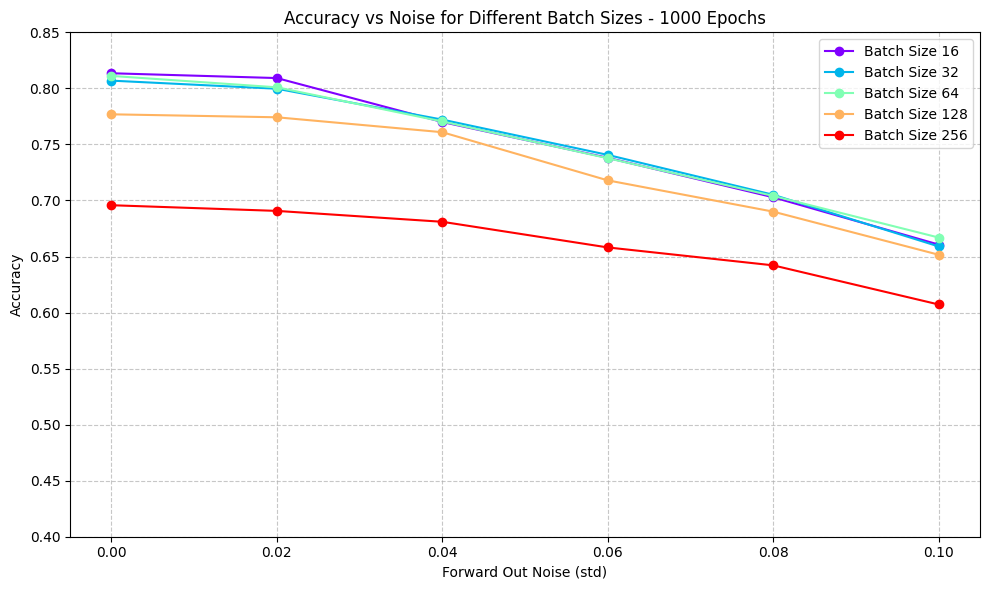

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique batch sizes
batch_sizes = sorted(df['batch_size'].unique())

# Create color map
colors = plt.cm.rainbow(np.linspace(0, 1, len(batch_sizes)))

plt.figure(figsize=(10, 6))

# Plot a line for each batch size
for batch_size, color in zip(batch_sizes, colors):
    batch_data = df[df['batch_size'] == batch_size]
    
    # Get maximum accuracy for each noise level
    max_accuracies = [np.mean(acc) for acc in batch_data['accuracies']]
    
    plt.plot(batch_data['noise'], max_accuracies, 
             marker='o', 
             label=f'Batch Size {batch_size}',
             color=color)

plt.xlabel('Forward Out Noise (std)')
# range of y-axis 0.4 to .85
plt.ylim(0.4, 0.85)
plt.ylabel('Accuracy')
plt.title('Accuracy vs Noise for Different Batch Sizes - 1000 Epochs')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

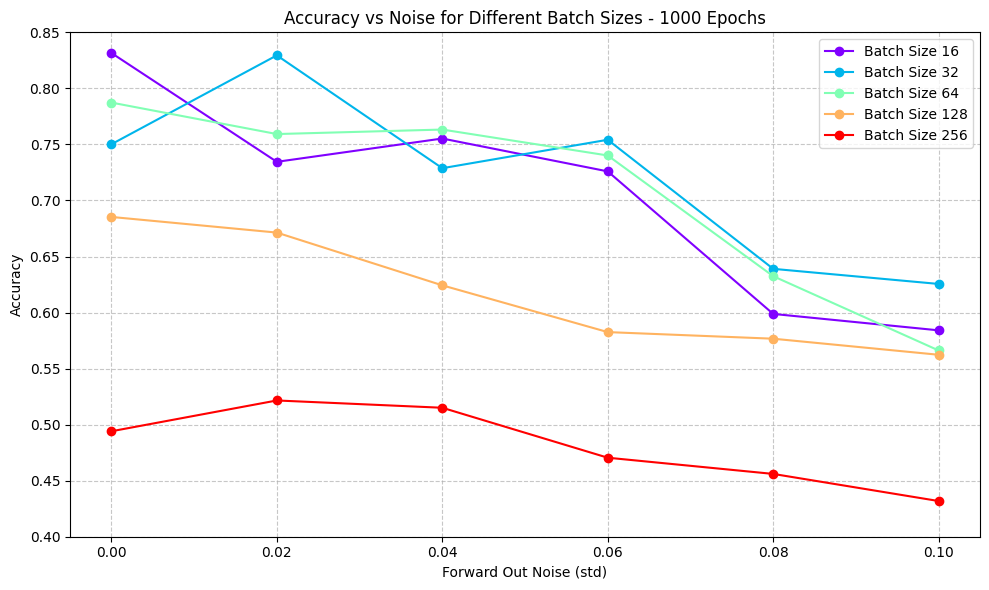

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique batch sizes
batch_sizes = sorted(df_simple['batch_size'].unique())

# Create color map
colors = plt.cm.rainbow(np.linspace(0, 1, len(batch_sizes)))

plt.figure(figsize=(10, 6))

# Plot a line for each batch size
for batch_size, color in zip(batch_sizes, colors):
    batch_data = df_simple[df_simple['batch_size'] == batch_size]
    
    # Get maximum accuracy for each noise level
    max_accuracies = [np.mean(acc) for acc in batch_data['accuracies']]
    
    plt.plot(batch_data['noise'], max_accuracies, 
             marker='o', 
             label=f'Batch Size {batch_size}',
             color=color)

plt.xlabel('Forward Out Noise (std)')
# range of y-axis 0.4 to .85
plt.ylim(0.4, 0.85)
plt.ylabel('Accuracy')
plt.title('Accuracy vs Noise for Different Batch Sizes - 1000 Epochs')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

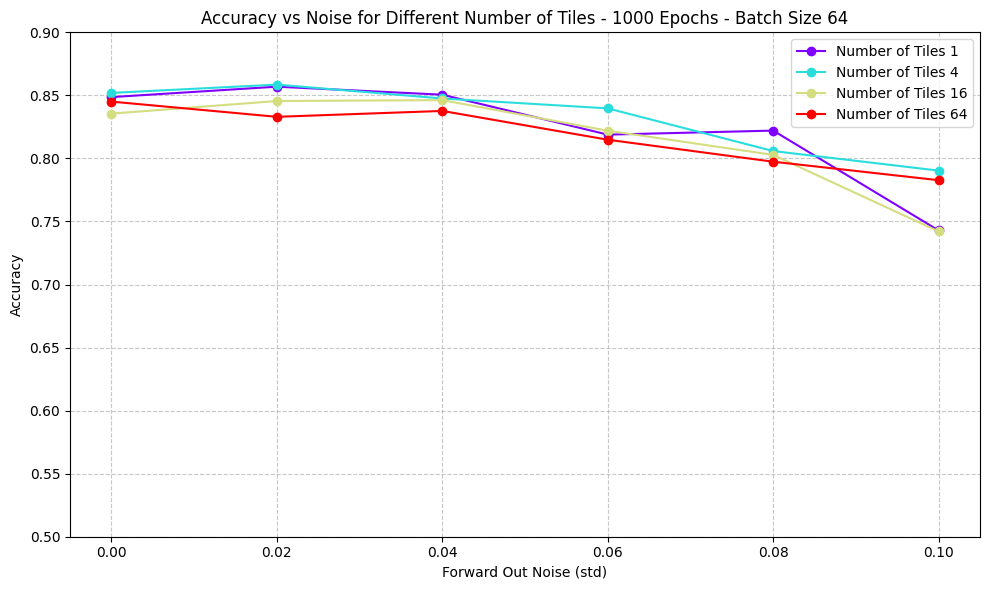

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique num_tiles
num_tiles = sorted(df_combined['num_tiles'].unique())

# Create color map
colors = plt.cm.rainbow(np.linspace(0, 1, len(num_tiles)))

plt.figure(figsize=(10, 6))

# Plot a line for each num_tiles
for num_tiles, color in zip(num_tiles, colors):
    batch_data = df_combined[df_combined['num_tiles'] == num_tiles]
    
    # Get maximum accuracy for each noise level
    max_accuracies = [np.mean(acc) for acc in batch_data['accuracies']]
    
    plt.plot(batch_data['noise'], max_accuracies, 
             marker='o', 
             label=f'Number of Tiles {num_tiles}',
             color=color)

plt.xlabel('Forward Out Noise (std)')
# range of y-axis 0.4 to .85
plt.ylim(0.5, 0.9)
plt.ylabel('Accuracy')
plt.title('Accuracy vs Noise for Different Number of Tiles - 1000 Epochs - Batch Size 64')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

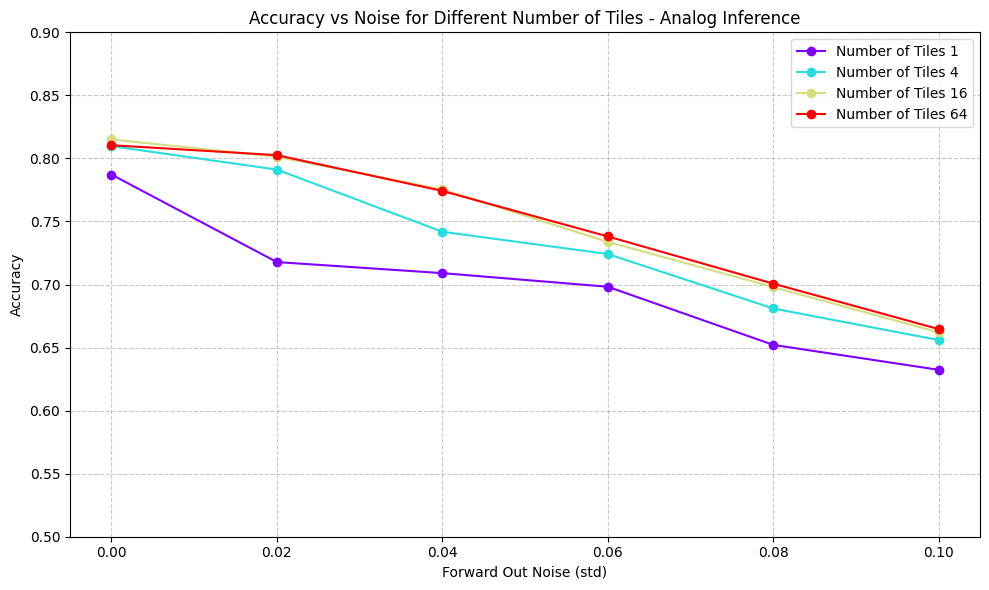

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique num_tiles
num_tiles = sorted(df_combined_analoginference['num_tiles'].unique())

# Create color map
colors = plt.cm.rainbow(np.linspace(0, 1, len(num_tiles)))

plt.figure(figsize=(10, 6))

# Plot a line for each num_tiles
for num_tiles_value, color in zip(num_tiles, colors):
    batch_data = df_combined_analoginference[df_combined_analoginference['num_tiles'] == num_tiles_value]
    
    # Get maximum accuracy for each noise level
    max_accuracies = [np.mean(acc) for acc in batch_data['accuracies']]
    
    plt.plot(batch_data['noise'], max_accuracies, 
             marker='o', 
             label=f'Number of Tiles {num_tiles_value}',
             color=color)

plt.xlabel('Forward Out Noise (std)')
# Set y-axis range from 0.4 to 0.85
plt.ylim(0.5, 0.9)
plt.ylabel('Accuracy')
plt.title('Accuracy vs Noise for Different Number of Tiles - Analog Inference')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

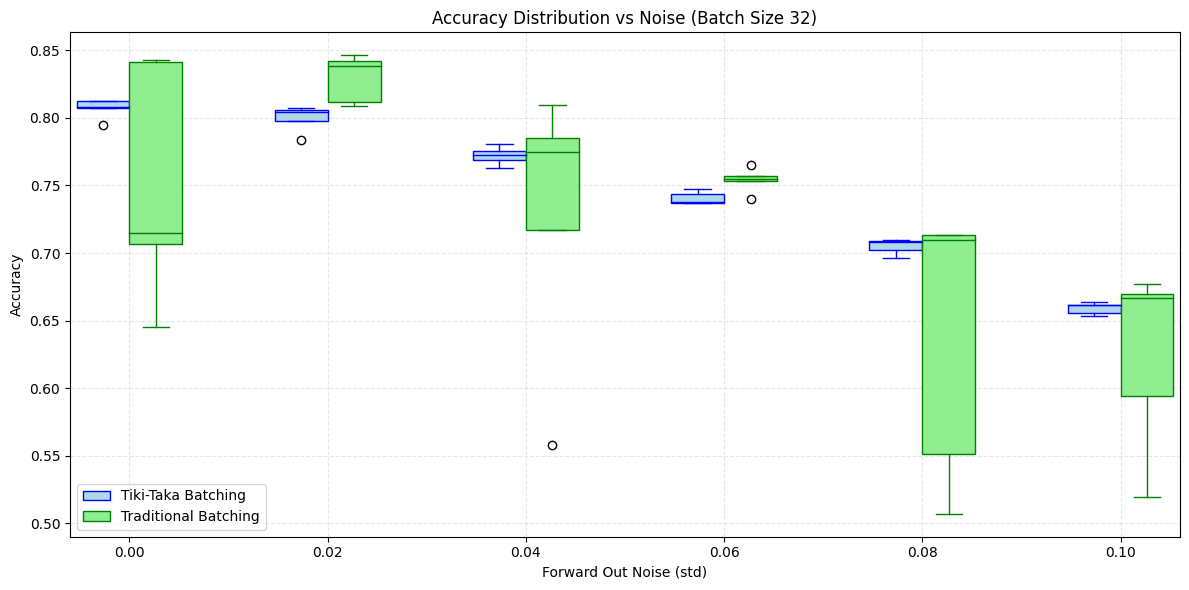

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Select batch size to visualize
batch_size = 32  # Change this to your desired batch size

# Filter both dataframes for the selected batch size
df1_batch = df[df['batch_size'] == batch_size]
df2_batch = df_simple[df_simple['batch_size'] == batch_size]

# Get unique noise values
noise_values = sorted(df1_batch['noise'].unique())

plt.figure(figsize=(12, 6))

# Calculate positions for the box plots
positions = np.arange(len(noise_values)) * 3
width = 0.8

# Create box plots for both datasets
bp1 = plt.boxplot([list(acc) for acc in df1_batch['accuracies']], 
                  positions=positions - width/2,
                  widths=width,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='blue'),
                  medianprops=dict(color='blue'),
                  whiskerprops=dict(color='blue'),
                  capprops=dict(color='blue'))

bp2 = plt.boxplot([list(acc) for acc in df2_batch['accuracies']], 
                  positions=positions + width/2,
                  widths=width,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightgreen', color='green'),
                  medianprops=dict(color='green'),
                  whiskerprops=dict(color='green'),
                  capprops=dict(color='green'))

# Customize the plot
plt.xlabel('Forward Out Noise (std)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Distribution vs Noise (Batch Size {batch_size})')
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks to noise values
plt.xticks(positions, [f'{n:.2f}' for n in noise_values])

# Add legend
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Tiki-Taka Batching', 'Traditional Batching'], loc='lower left')

plt.tight_layout()
plt.show()

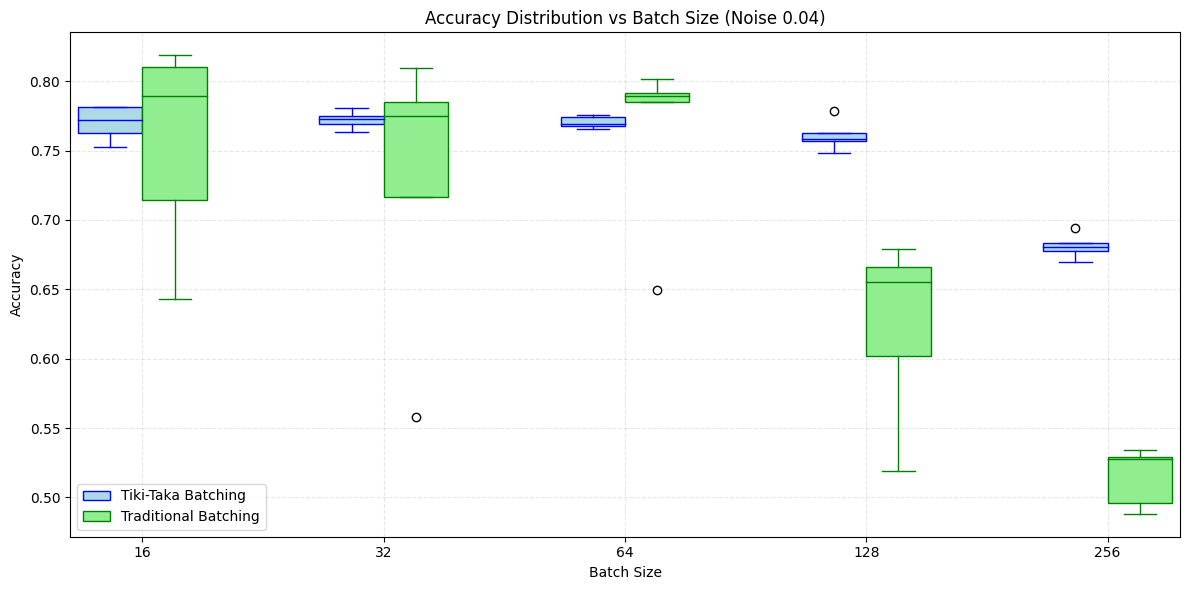

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Select noise level to visualize
noise_level = 0.04  # Change this to your desired noise level

# Filter both dataframes for the selected noise level
df1_noise = df[df['noise'] == noise_level]
df2_noise = df_simple[df_simple['noise'] == noise_level]

# Get unique batch sizes
batch_sizes = sorted(df1_noise['batch_size'].unique())

plt.figure(figsize=(12, 6))

# Calculate positions for the box plots
positions = np.arange(len(batch_sizes)) * 3
width = 0.8

# Create box plots for both datasets
bp1 = plt.boxplot([list(acc) for acc in df1_noise['accuracies']], 
                  positions=positions - width/2,
                  widths=width,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='blue'),
                  medianprops=dict(color='blue'),
                  whiskerprops=dict(color='blue'),
                  capprops=dict(color='blue'))

bp2 = plt.boxplot([list(acc) for acc in df2_noise['accuracies']], 
                  positions=positions + width/2,
                  widths=width,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightgreen', color='green'),
                  medianprops=dict(color='green'),
                  whiskerprops=dict(color='green'),
                  capprops=dict(color='green'))

# Customize the plot
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Distribution vs Batch Size (Noise {noise_level:.2f})')
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks to batch sizes
plt.xticks(positions, batch_sizes)

# Add legend
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Tiki-Taka Batching', 'Traditional Batching'], loc='lower left')

plt.tight_layout()
plt.show()

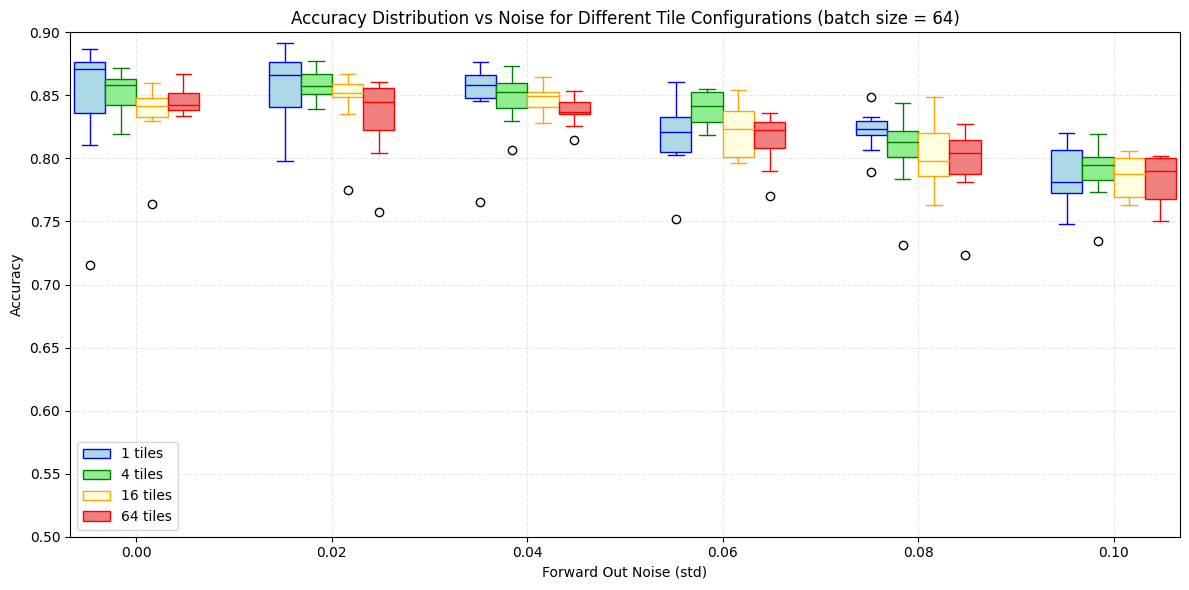

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique noise values and tile configurations
noise_values = sorted(df_combined['noise'].unique())
tile_configs = sorted(df_combined['num_tiles'].unique())

plt.figure(figsize=(12, 6))

# Calculate positions for the box plots
positions = np.arange(len(noise_values)) * (len(tile_configs) + 1)
width = 0.8

# Create color map
colors = ['blue', 'green', 'orange', 'red']
lightcolors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
boxes = []  # Store the boxes for legend

# Create a different colored box plot for each tile configuration
for i, tiles in enumerate(tile_configs):
    # Filter data for this tile configuration
    tile_data = df_combined[df_combined['num_tiles'] == tiles]
    
    # Create box plot
    bp = plt.boxplot([list(acc) for acc in tile_data['accuracies']], 
                     positions=positions + i*width - (len(tile_configs)-1)*width/2,
                     widths=width,
                     patch_artist=True,
                     boxprops=dict(facecolor=lightcolors[i], color=colors[i]),
                     medianprops=dict(color=colors[i]),
                     whiskerprops=dict(color=colors[i]),
                     capprops=dict(color=colors[i]))
    
    # Store the first box of this color for the legend
    boxes.append(bp['boxes'][0])

# Customize the plot
plt.ylim(0.5, 0.9)
plt.xlabel('Forward Out Noise (std)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Distribution vs Noise for Different Tile Configurations (batch size = 64)')
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks to noise values
plt.xticks(positions, [f'{n:.2f}' for n in noise_values])

# Add legend manually
plt.legend(boxes, [f'{tiles} tiles' for tiles in tile_configs], loc='lower left')

plt.tight_layout()
plt.show()

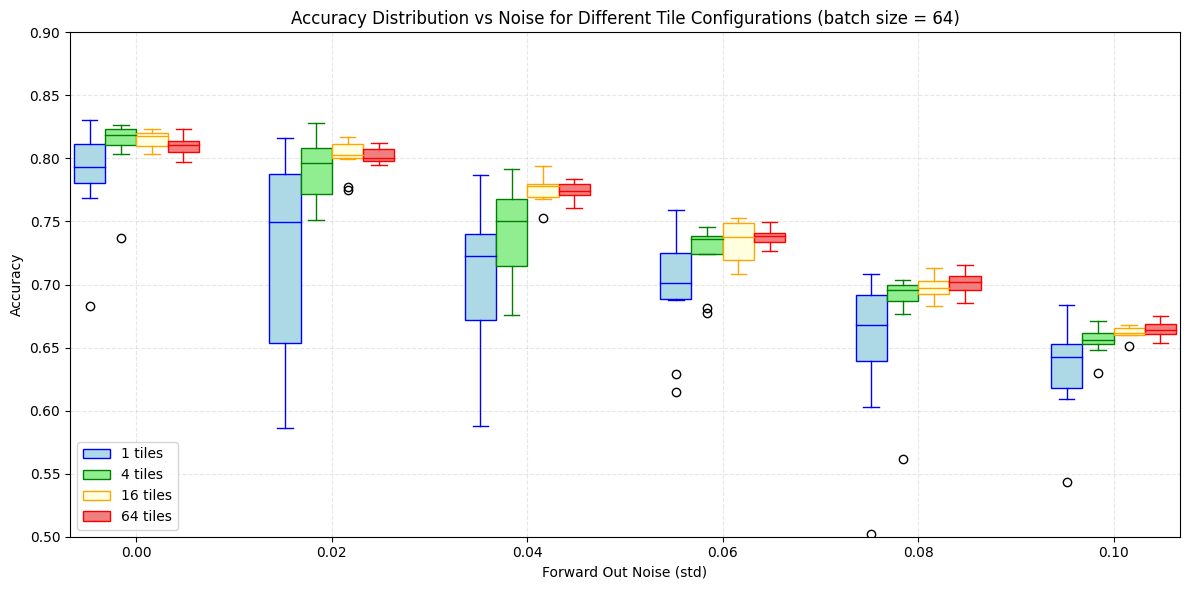

In [118]:
# same but for analog inference

import matplotlib.pyplot as plt
import numpy as np

# Get unique noise values and tile configurations
noise_values = sorted(df_combined_analoginference['noise'].unique())
tile_configs = sorted(df_combined_analoginference['num_tiles'].unique())

plt.figure(figsize=(12, 6))

# Calculate positions for the box plots
positions = np.arange(len(noise_values)) * (len(tile_configs) + 1)
width = 0.8

# Create color map
colors = ['blue', 'green', 'orange', 'red']
lightcolors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
boxes = []  # Store the boxes for legend

# Create a different colored box plot for each tile configuration
for i, tiles in enumerate(tile_configs):
    # Filter data for this tile configuration
    tile_data = df_combined_analoginference[df_combined_analoginference['num_tiles'] == tiles]
    
    # Create box plot
    bp = plt.boxplot([list(acc) for acc in tile_data['accuracies']],
                     positions=positions + i*width - (len(tile_configs)-1)*width/2,
                     widths=width,
                     patch_artist=True,
                     boxprops=dict(facecolor=lightcolors[i], color=colors[i]),
                     medianprops=dict(color=colors[i]),
                     whiskerprops=dict(color=colors[i]),
                     capprops=dict(color=colors[i]))
    
    # Store the first box of this color for the legend
    boxes.append(bp['boxes'][0])

# Customize the plot
plt.ylim(0.5, 0.9)
plt.xlabel('Forward Out Noise (std)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Distribution vs Noise for Different Tile Configurations (batch size = 64)')
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks to noise values
plt.xticks(positions, [f'{n:.2f}' for n in noise_values])

# Add legend manually
plt.legend(boxes, [f'{tiles} tiles' for tiles in tile_configs], loc='lower left')

plt.tight_layout()
plt.show()

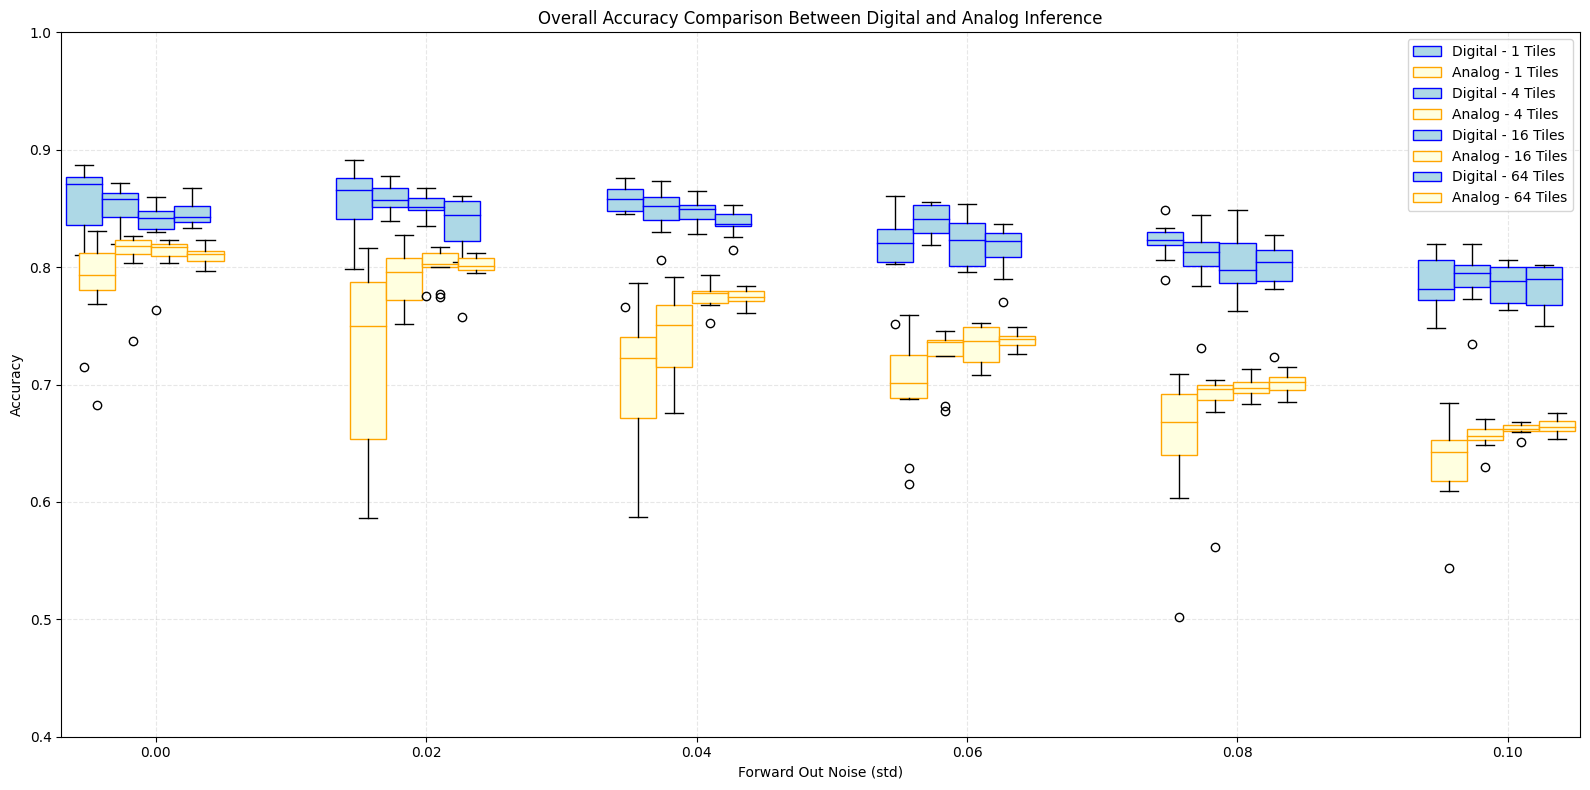

In [40]:
# Plotting both digital and analog inference results together

import matplotlib.pyplot as plt
import numpy as np

# Get unique noise values and tile configurations for comparison
noise_values = sorted(df_combined['noise'].unique())
tile_configs = sorted(df_combined['num_tiles'].unique())

# Create color map for different inference types
colors = {'digital': 'blue', 'analog': 'orange'}
lightcolors = {'digital': 'lightblue', 'analog': 'lightyellow'}


# Combined plot showing all tile configurations side by side
plt.figure(figsize=(16, 8))

# Get unique noise values and tile configurations
noise_values = sorted(df_combined['noise'].unique())
tile_configs = sorted(df_combined['num_tiles'].unique())

positions_digital = np.arange(len(noise_values)) * (len(tile_configs) + 2)
width = 0.8

handles = []

for i, tiles in enumerate(tile_configs):
    # Digital inference
    digital_data = df_combined[df_combined['num_tiles'] == tiles]
    bp_digital = plt.boxplot([list(acc) for acc in digital_data['accuracies']],
                            positions=positions_digital + i*width - len(tile_configs)*width/2,
                            widths=width,
                            patch_artist=True,
                            boxprops=dict(facecolor=lightcolors['digital'], color=colors['digital']),
                            medianprops=dict(color=colors['digital']))
    handles.append(bp_digital['boxes'][0])
    
    # Analog inference
    analog_data = df_combined_analoginference[df_combined_analoginference['num_tiles'] == tiles]
    bp_analog = plt.boxplot([list(acc) for acc in analog_data['accuracies']],
                           positions=positions_digital + i*width - len(tile_configs)*width/2 + 0.3,
                           widths=width,
                           patch_artist=True,
                           boxprops=dict(facecolor=lightcolors['analog'], color=colors['analog']),
                           medianprops=dict(color=colors['analog']))
    handles.append(bp_analog['boxes'][0])

plt.title('Overall Accuracy Comparison Between Digital and Analog Inference')
plt.xlabel('Forward Out Noise (std)')
plt.xticks(positions_digital, [f'{n:.2f}' for n in noise_values])
plt.ylabel('Accuracy')
plt.ylim(0.4, 1.0)
plt.grid(True, linestyle='--', alpha=0.3)

# Add legend
labels = []
for tiles in tile_configs:
    labels.append(f'Digital - {tiles} Tiles')
    labels.append(f'Analog - {tiles} Tiles')

plt.legend(handles[:len(tile_configs)*2], labels, loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

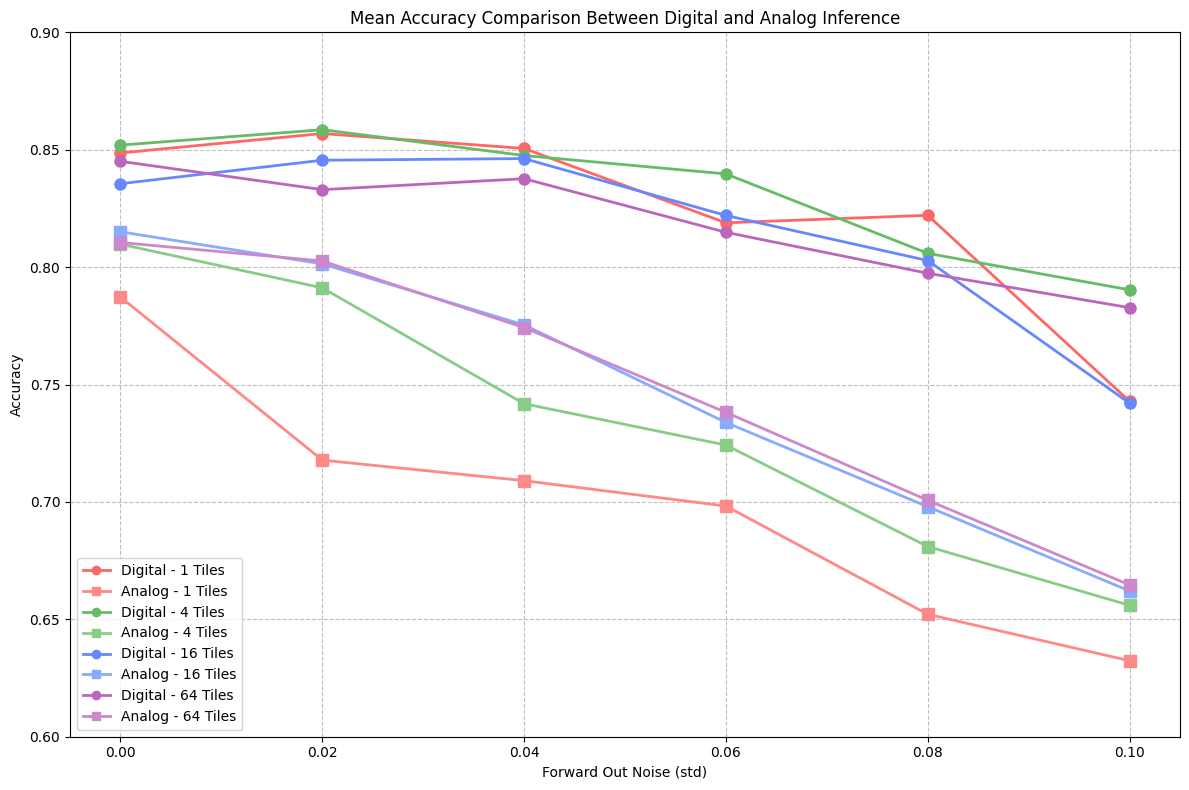

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique noise values and tile configurations for comparison
noise_values = sorted(df_combined['noise'].unique())
tile_configs = sorted(df_combined['num_tiles'].unique())

# Create a color map with solid pastel colors
colors = {
    1: {'digital': '#FF6666', 'analog': '#FF8888'},  # Solid coral / Salmon pink
    4: {'digital': '#66BB66', 'analog': '#88CC88'},  # Solid sage / Mint green
    16: {'digital': '#6688FF', 'analog': '#88AAFF'},  # Solid cornflower / Sky blue
    64: {'digital': '#BB66BB', 'analog': '#CC88CC'},  # Solid mauve / Light purple
}

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

for i, tiles in enumerate(tile_configs):
    # Digital inference
    digital_data = df_combined[df_combined['num_tiles'] == tiles]
    mean_digital = [np.mean(acc) for acc in digital_data['accuracies']]
    plt.plot(noise_values, mean_digital,
             marker='o', markersize=8,
             color=colors[tiles]['digital'], linestyle='-',
             linewidth=2, label=f'Digital - {tiles} Tiles')
    
    # Analog inference
    analog_data = df_combined_analoginference[df_combined_analoginference['num_tiles'] == tiles]
    mean_analog = [np.mean(acc) for acc in analog_data['accuracies']]
    plt.plot(noise_values, mean_analog,
             marker='s', markersize=8,
             color=colors[tiles]['analog'], linestyle='-',
             linewidth=2, label=f'Analog - {tiles} Tiles')

# Add labels and title
plt.title('Mean Accuracy Comparison Between Digital and Analog Inference')
plt.xlabel('Forward Out Noise (std)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(noise_values)  # Keep x-ticks at actual noise values

# Set y-axis limits
plt.ylim(0.6, 0.9)

# Create a legend with consistent order and clear labels
handles = []
labels = []

for tiles in tile_configs:
    # Add Digital line
    handles.append(plt.Line2D([0], [0],
                              color=colors[tiles]['digital'],
                              linestyle='-', linewidth=2, marker='o'))
    labels.append(f'Digital - {tiles} Tiles')
    
    # Add Analog line
    handles.append(plt.Line2D([0], [0],
                              color=colors[tiles]['analog'],
                              linestyle='-', linewidth=2, marker='s'))
    labels.append(f'Analog - {tiles} Tiles')

# Add the legend with consistent order and clear labels
plt.legend(handles, labels,
          bbox_to_anchor=(0, 0), loc='lower left',
          borderaxespad=0.5, fancybox=True, shadow=False)

# Add grid and adjust layout
plt.tight_layout()
plt.show()

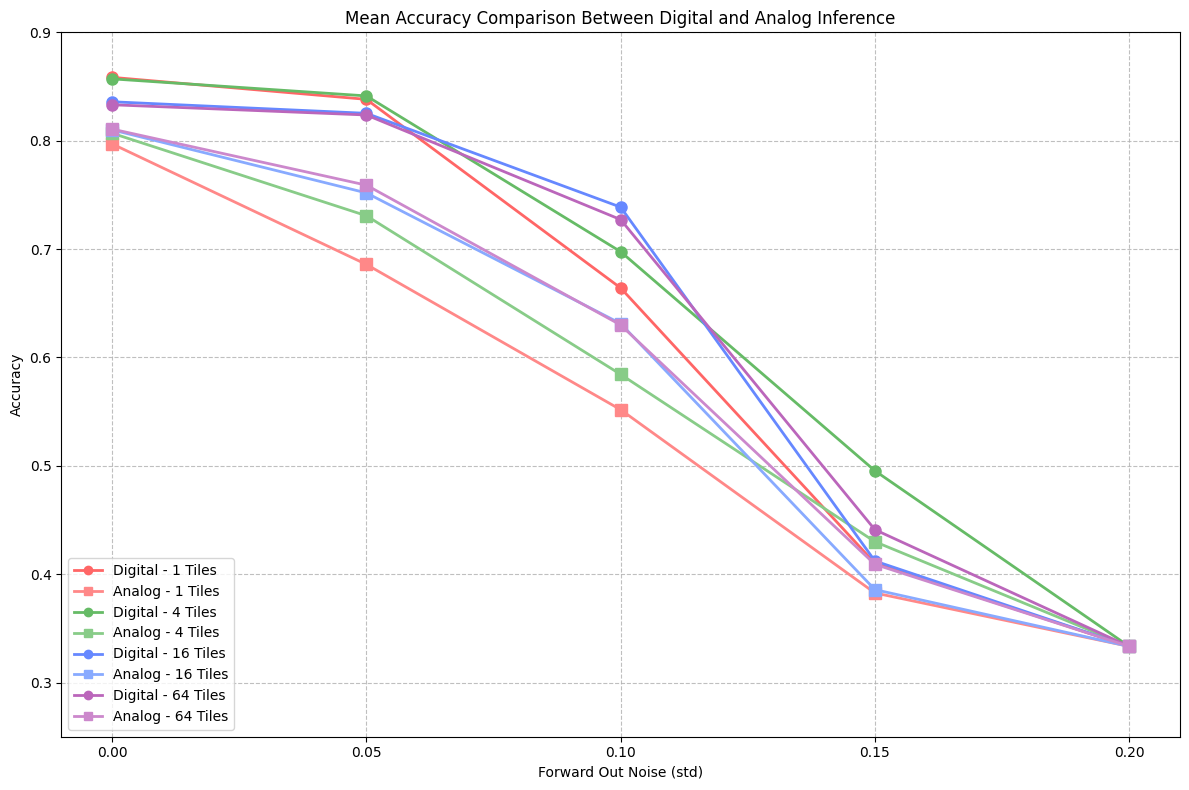

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique noise values and tile configurations for comparison
noise_values = sorted(df_combined_xnoisy['noise'].unique())
tile_configs = sorted(df_combined_xnoisy['num_tiles'].unique())

# Create a color map with solid pastel colors (same as before)
colors = {
    1: {'digital': '#FF6666', 'analog': '#FF8888'},   # Solid coral / Salmon pink
    4: {'digital': '#66BB66', 'analog': '#88CC88'},   # Solid sage / Mint green
    16: {'digital': '#6688FF', 'analog': '#88AAFF'},  # Solid cornflower / Sky blue
    64: {'digital': '#BB66BB', 'analog': '#CC88CC'}   # Solid mauve / Light purple
}

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

for i, tiles in enumerate(tile_configs):
    # Digital inference using df_combined_xnoisy
    digital_data = df_combined_xnoisy[df_combined_xnoisy['num_tiles'] == tiles]
    mean_digital = [np.mean(acc) for acc in digital_data['digital_accuracies']]
    plt.plot(noise_values, mean_digital,
             marker='o', markersize=8,
             color=colors[tiles]['digital'], linestyle='-',
             linewidth=2, label=f'Digital - {tiles} Tiles')
    
    # Analog inference using df_combined_xnoisy
    analog_data = df_combined_xnoisy[df_combined_xnoisy['num_tiles'] == tiles]
    mean_analog = [np.mean(acc) for acc in analog_data['analog_accuracies']]
    plt.plot(noise_values, mean_analog,
             marker='s', markersize=8,
             color=colors[tiles]['analog'], linestyle='-',
             linewidth=2, label=f'Analog - {tiles} Tiles')

# Add labels and title
plt.title('Mean Accuracy Comparison Between Digital and Analog Inference')
plt.xlabel('Forward Out Noise (std)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(noise_values)  # Keep x-ticks at actual noise values

# Set y-axis limits
plt.ylim(0.25, 0.9)

# Create a legend with consistent order and clear labels
handles = []
labels = []

for tiles in tile_configs:
    # Add Digital line
    handles.append(plt.Line2D([0], [0],
                              color=colors[tiles]['digital'],
                              linestyle='-', linewidth=2, marker='o'))
    labels.append(f'Digital - {tiles} Tiles')
    
    # Add Analog line
    handles.append(plt.Line2D([0], [0],
                              color=colors[tiles]['analog'],
                              linestyle='-', linewidth=2, marker='s'))
    labels.append(f'Analog - {tiles} Tiles')

# Add the legend with consistent order and clear labels
plt.legend(handles, labels,
          bbox_to_anchor=(0, 0), loc='lower left',
          borderaxespad=0.5, fancybox=True, shadow=False)

# Add grid and adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df_weight_distribution = pd.read_csv('training_weight_distribution_0.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_weight_distribution['w1'] = df_weight_distribution['w1'].str.replace('nan', 'None', regex=False).apply(eval)

,num_tiles,noise,w1,b1,w2,b2
0,1,0.1,"[[[0.11559025198221207, -0.3339715003967285], ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[0.037657324224710464, -0.13156265020370483,...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."
1,4,0.1,"[[[0.049827419221401215, 0.14036236703395844],...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[-0.14665357768535614, -0.3902878165245056, ...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."
2,16,0.1,"[[[-0.1417306810617447, 0.11186064034700394], ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[0.15622831881046295, 0.167262002825737, -0....","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."
3,64,0.1,"[[[0.03193391114473343, 0.0865914449095726], [...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[0.007134408224374056, 0.15559199452400208, ...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."


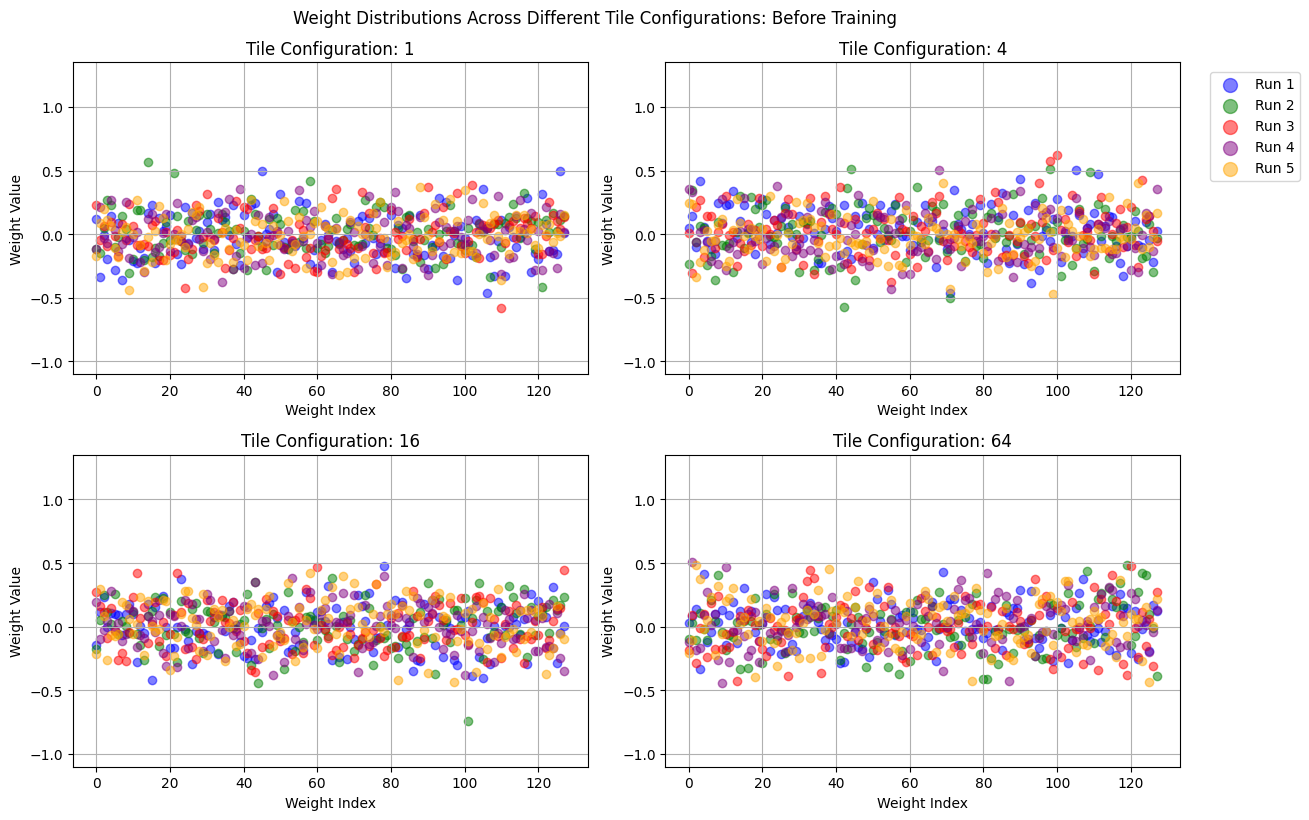

In [92]:
import matplotlib.pyplot as plt
import numpy as np

df_weight_distribution = pd.read_csv('training_weight_distribution_0.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_weight_distribution['w1'] = df_weight_distribution['w1'].str.replace('nan', 'None', regex=False).apply(eval)

tile_configurations = ['1', '4', '16', '64']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a set to store unique labels
unique_labels = set()

for idx, tile in enumerate(tile_configurations):
    filtered_df = df_weight_distribution[df_weight_distribution['num_tiles'] == int(tile)]
    w1 = filtered_df['w1'][idx]
    
    for run_idx in range(len(w1)):
        combined_weights = []
        set_weights = w1[run_idx]
        for weights in set_weights:
            combined_weights.extend(weights)
        
        weights_flat = np.array(combined_weights)
        x_values = np.arange(len(weights_flat))
        
        # Add labels to the unique_labels set
        label = f'Run {run_idx + 1}'
        if label not in unique_labels:
            axes[idx].scatter(x_values, weights_flat, label=label, color=colors[run_idx % len(colors)], alpha=0.5)
            unique_labels.add(label)
        else:
            axes[idx].scatter(x_values, weights_flat, color=colors[run_idx % len(colors)], alpha=0.5)
        
    # Customize the plot for the current tile configuration
    axes[idx].set_title(f'Tile Configuration: {tile}')
    axes[idx].set_xlabel('Weight Index')
    axes[idx].set_ylabel('Weight Value')
    axes[idx].grid(True)
    axes[idx].set_ylim(-1.1, 1.35)

# Create a legend with unique labels outside the plot
handles = [plt.scatter([], [], color=color, marker='o', s=100, alpha=0.5) for color in colors[:len(unique_labels)]]

fig.legend(handles, sorted(unique_labels), loc='upper center', bbox_to_anchor=(1.05, 0.95), ncol=1)

# Adjust layout and display the plots
plt.tight_layout()
plt.suptitle('Weight Distributions Across Different Tile Configurations: Before Training', y=1.02)
plt.show()

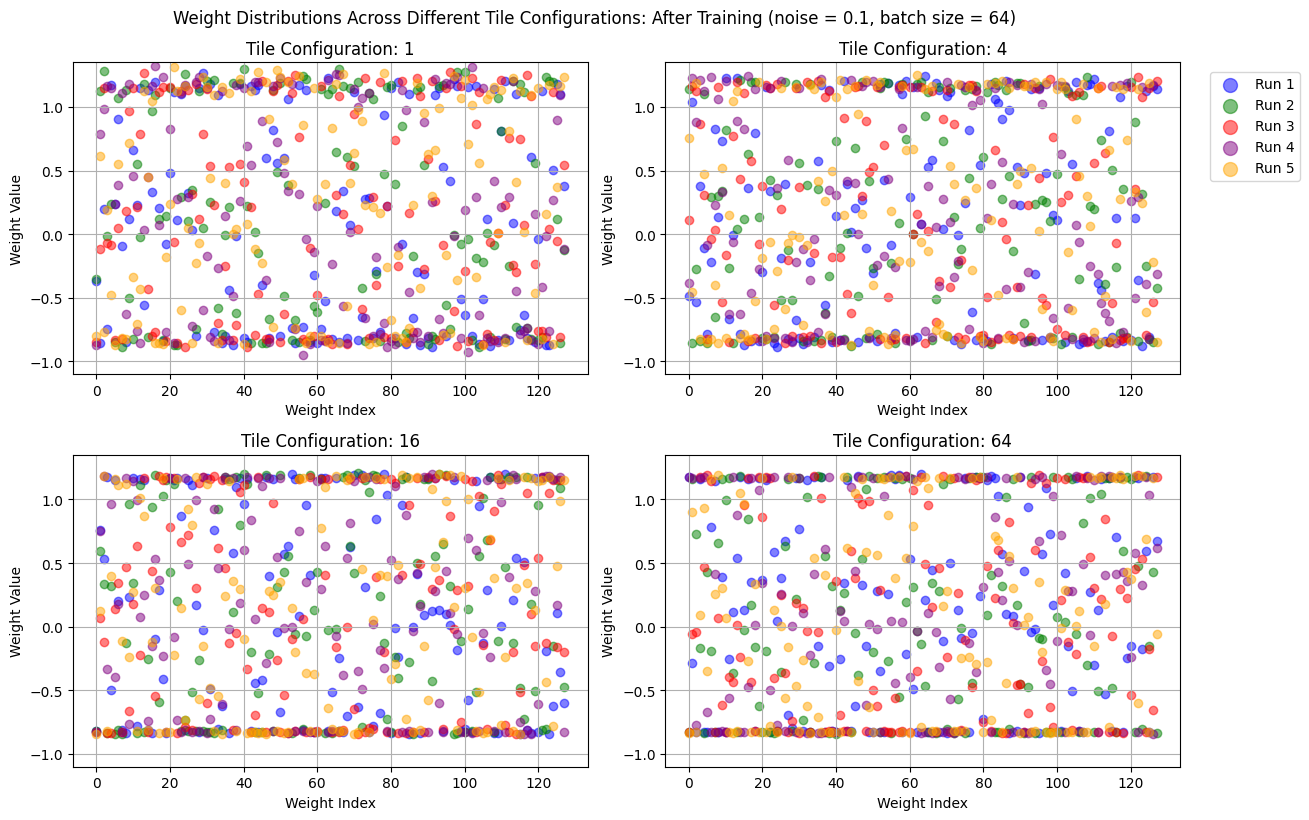

In [124]:
import matplotlib.pyplot as plt
import numpy as np

df_weight_distribution = pd.read_csv('training_weight_distribution_1000.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_weight_distribution['w1'] = df_weight_distribution['w1'].str.replace('nan', 'None', regex=False).apply(eval)

tile_configurations = ['1', '4', '16', '64']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a set to store unique labels
unique_labels = set()

for idx, tile in enumerate(tile_configurations):
    filtered_df = df_weight_distribution[df_weight_distribution['num_tiles'] == int(tile)]
    w1 = filtered_df['w1'][idx]
    
    for run_idx in range(len(w1)):
        combined_weights = []
        set_weights = w1[run_idx]
        for weights in set_weights:
            combined_weights.extend(weights)
        
        weights_flat = np.array(combined_weights)
        x_values = np.arange(len(weights_flat))
        
        # Add labels to the unique_labels set
        label = f'Run {run_idx + 1}'
        if label not in unique_labels:
            axes[idx].scatter(x_values, weights_flat, label=label, color=colors[run_idx % len(colors)], alpha=0.5)
            unique_labels.add(label)
        else:
            axes[idx].scatter(x_values, weights_flat, color=colors[run_idx % len(colors)], alpha=0.5)
        
    # Customize the plot for the current tile configuration
    axes[idx].set_title(f'Tile Configuration: {tile}')
    axes[idx].set_xlabel('Weight Index')
    axes[idx].set_ylabel('Weight Value')
    axes[idx].grid(True)
    axes[idx].set_ylim(-1.1, 1.35)

# Create a legend with unique labels outside the plot
handles = [plt.scatter([], [], color=color, marker='o', s=100, alpha=0.5) for color in colors[:len(unique_labels)]]

fig.legend(handles, sorted(unique_labels), loc='upper center', bbox_to_anchor=(1.05, 0.95), ncol=1)

# Adjust layout and display the plots
plt.tight_layout()
plt.suptitle('Weight Distributions Across Different Tile Configurations: After Training (noise = 0.1, batch size = 64)', y=1.02)
plt.show()

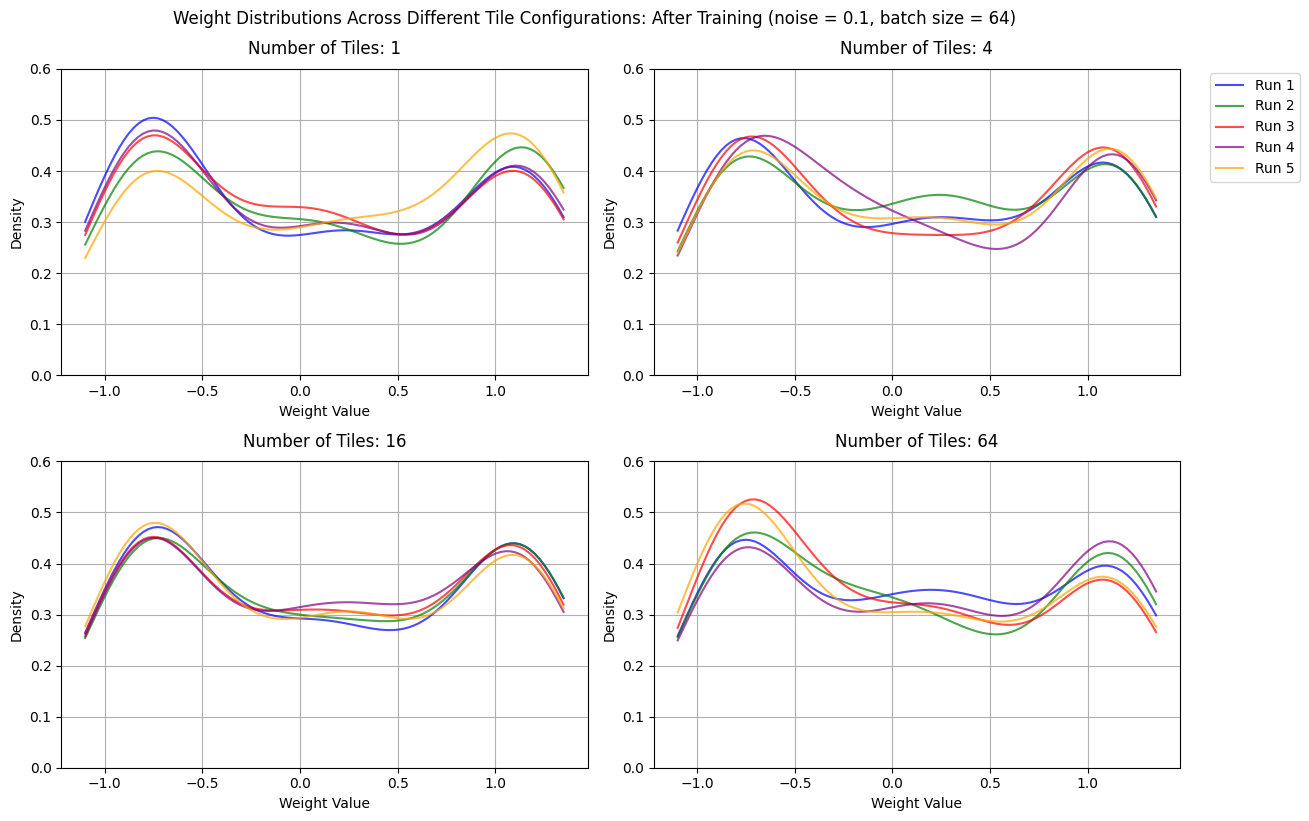

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Read the CSV file
df_weight_distribution = pd.read_csv('training_weight_distribution_1000.csv')
df_weight_distribution['w1'] = df_weight_distribution['w1'].str.replace('nan', 'None', regex=False).apply(eval)

tile_configurations = ['1', '4', '16', '64']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

colors = ['blue', 'green', 'red', 'purple', 'orange']
num_bins = 10

# Create a set to store unique labels
unique_labels = set()

# First pass: collect all unique labels
for idx, tile in enumerate(tile_configurations):
    filtered_df = df_weight_distribution[df_weight_distribution['num_tiles'] == int(tile)]
    w1 = filtered_df['w1'][idx]
    
    combined_weights_all_runs = []
    for run_idx in range(len(w1)):
        set_weights = w1[run_idx]
        combined_weights = []
        for weights in set_weights:
            combined_weights.extend(weights)
        
        combined_weights_all_runs.append(combined_weights)
    
        # Add unique labels
        label = f'Run {run_idx + 1}'
        unique_labels.add(label)

# Convert the set to a list and sort it for consistent order
unique_labels = sorted(unique_labels)

# Second pass: plot all data and handle labels
for idx, tile in enumerate(tile_configurations):
    filtered_df = df_weight_distribution[df_weight_distribution['num_tiles'] == int(tile)]
    w1 = filtered_df['w1'][idx]
    
    combined_weights_all_runs = []
    for run_idx in range(len(w1)):
        set_weights = w1[run_idx]
        combined_weights = []
        for weights in set_weights:
            combined_weights.extend(weights)
        
        combined_weights_all_runs.append(combined_weights)
    
    # Create a continuous distribution curve using kernel density estimation
    axes[idx].set_title(f'Number of Tiles: {tile}', y=1.02)
    axes[idx].set_xlabel('Weight Value')
    axes[idx].set_ylabel('Density')
    axes[idx].set_ylim(0.0, 0.6)
    axes[idx].grid(True)

    # Plot the KDE for each run
    for run_idx, weights in enumerate(combined_weights_all_runs):
        weights_flat = np.array(weights)
        
        # Perform kernel density estimation
        kde = stats.gaussian_kde(weights_flat)
        x_points = np.linspace(-1.1, 1.35, 100)  # Create points for the curve
        density = kde(x_points)  # Calculate densities
        
        axes[idx].plot(x_points, density, color=colors[run_idx % len(colors)],
                      label=f'Run {run_idx + 1}', alpha=0.7)

# Create a single legend for the whole figure without duplicates
fig.legend(unique_labels, bbox_to_anchor=(1.05, 0.95), loc='upper center', ncol=1)

# Adjust layout and display the plots
plt.tight_layout()
plt.suptitle('Weight Distributions Across Different Tile Configurations: After Training (noise = 0.1, batch size = 64)', y=1.02)
plt.show()

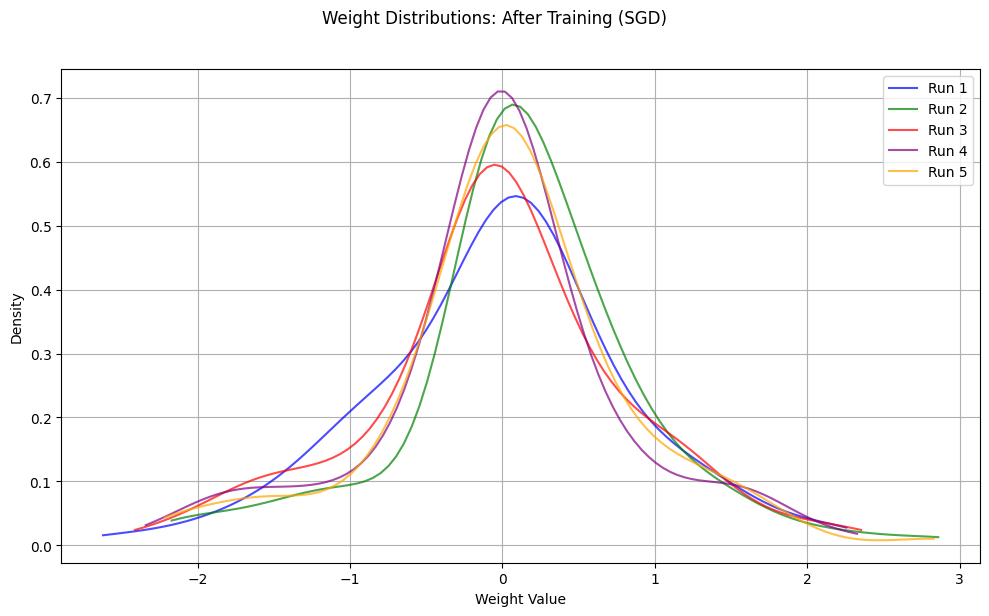

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Read the CSV file
df = pd.read_csv('training_weight_distribution_sgd.csv', header=None)

# Process the data
runs_weights = []
for row in df.itertuples(index=False):
    row_weights = [eval(item) for item in row]
    x_weights = [weight[0] for weight in row_weights]
    y_weights = [weight[1] for weight in row_weights]
    runs_weights.append((x_weights, y_weights))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Weight Distributions: After Training (SGD)', y=1.02)

# Colors for different runs
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot KDE for all weights
ax.set_xlabel('Weight Value')
ax.set_ylabel('Density')
ax.grid(True)

for i, (x_weights, y_weights) in enumerate(runs_weights):
    all_weights = x_weights + y_weights
    kde = stats.gaussian_kde(all_weights)
    weight_points = np.linspace(min(all_weights), max(all_weights), 100)
    density = kde(weight_points)
    ax.plot(weight_points, density, color=colors[i], label=f'Run {i+1}', alpha=0.7)

ax.legend()
plt.tight_layout()
plt.show()

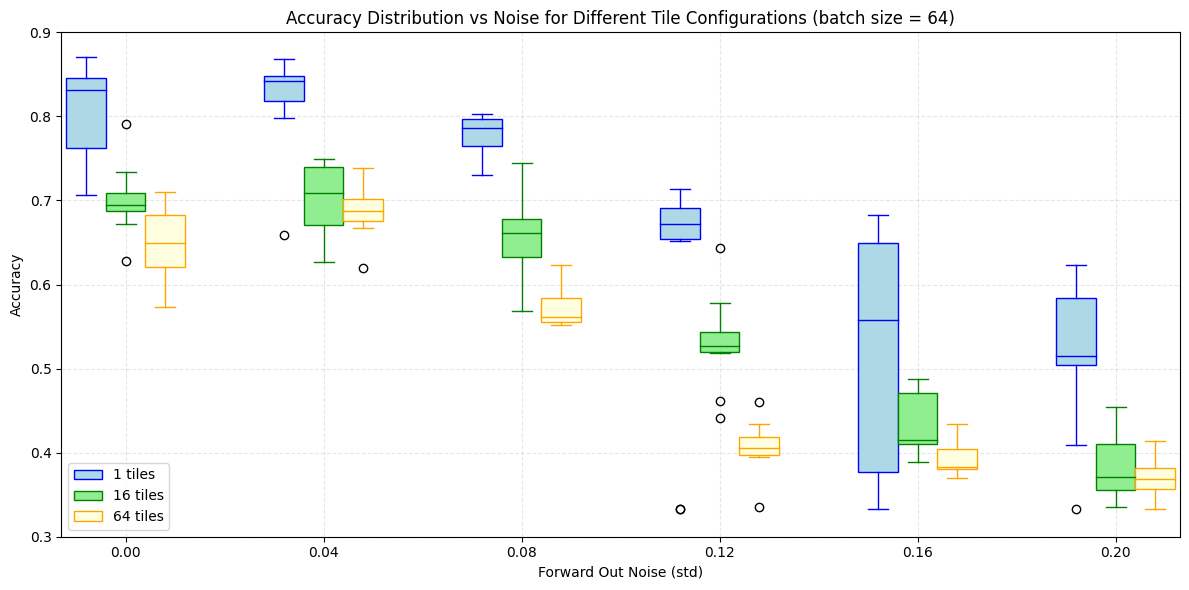

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_combined = pd.read_csv('cttv2_training_results_combined_v2.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_combined['digital_losses'] = df_combined['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_combined['digital_accuracies'] = df_combined['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_combined['analog_losses'] = df_combined['analog_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_combined['analog_accuracies'] = df_combined['analog_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Get unique noise values and tile configurations
noise_values = sorted(df_combined['noise'].unique())
tile_configs = sorted(df_combined['num_tiles'].unique())

plt.figure(figsize=(12, 6))

# Calculate positions for the box plots
positions = np.arange(len(noise_values)) * (len(tile_configs) + 1)
width = 0.8

# Create color map
colors = ['blue', 'green', 'orange', 'red']
lightcolors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
boxes = []  # Store the boxes for legend

# Create a different colored box plot for each tile configuration
for i, tiles in enumerate(tile_configs):
    # Filter data for this tile configuration
    tile_data = df_combined[df_combined['num_tiles'] == tiles]
    
    # Create box plot
    bp = plt.boxplot([list(acc) for acc in tile_data['digital_accuracies']], 
                     positions=positions + i*width - (len(tile_configs)-1)*width/2,
                     widths=width,
                     patch_artist=True,
                     boxprops=dict(facecolor=lightcolors[i], color=colors[i]),
                     medianprops=dict(color=colors[i]),
                     whiskerprops=dict(color=colors[i]),
                     capprops=dict(color=colors[i]))
    
    # Store the first box of this color for the legend
    boxes.append(bp['boxes'][0])

# Customize the plot
plt.ylim(0.3, 0.9)
plt.xlabel('Forward Out Noise (std)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Distribution vs Noise for Different Tile Configurations (batch size = 64)')
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks to noise values
plt.xticks(positions, [f'{n:.2f}' for n in noise_values])

# Add legend manually
plt.legend(boxes, [f'{tiles} tiles' for tiles in tile_configs], loc='lower left')

plt.tight_layout()
plt.show()

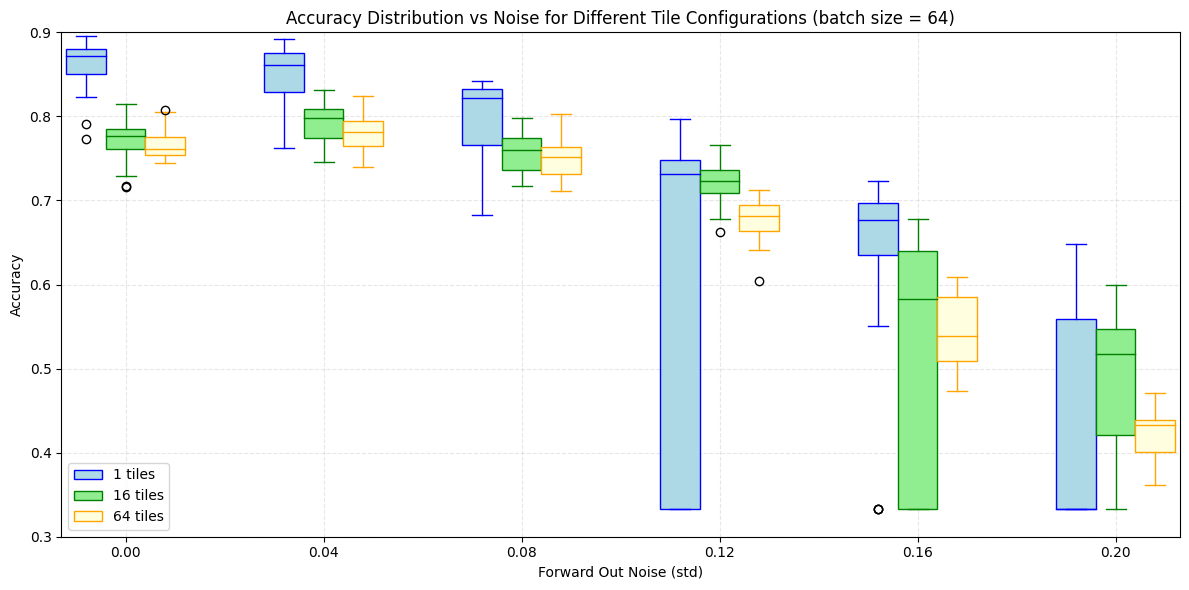

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_1 = pd.read_csv('agad_training_results_combined_v2_first.csv')
df_2 = pd.read_csv('agad_training_results_combined_v2_second.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_1['digital_losses'] = df_1['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_1['digital_accuracies'] = df_1['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_1['analog_losses'] = df_1['analog_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_1['analog_accuracies'] = df_1['analog_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_2['digital_losses'] = df_2['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_2['digital_accuracies'] = df_2['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_2['analog_losses'] = df_2['analog_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_2['analog_accuracies'] = df_2['analog_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# combine the two dataframes (extending the arrays in the lists)
# Combine the two dataframes by concatenating the lists in the columns
df_combined = pd.concat([df_1, df_2]).groupby(level=0).agg(lambda x: sum(x, []) if isinstance(x.iloc[0], list) else x.iloc[0])

# Get unique noise values and tile configurations
noise_values = sorted(df_combined['noise'].unique())
tile_configs = sorted(df_combined['num_tiles'].unique())

plt.figure(figsize=(12, 6))

# Calculate positions for the box plots
positions = np.arange(len(noise_values)) * (len(tile_configs) + 1)
width = 0.8

# Create color map
colors = ['blue', 'green', 'orange', 'red']
lightcolors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
boxes = []  # Store the boxes for legend

# Create a different colored box plot for each tile configuration
for i, tiles in enumerate(tile_configs):
    # Filter data for this tile configuration
    tile_data = df_combined[df_combined['num_tiles'] == tiles]
    
    # Create box plot
    bp = plt.boxplot([list(acc) for acc in tile_data['digital_accuracies']], 
                     positions=positions + i*width - (len(tile_configs)-1)*width/2,
                     widths=width,
                     patch_artist=True,
                     boxprops=dict(facecolor=lightcolors[i], color=colors[i]),
                     medianprops=dict(color=colors[i]),
                     whiskerprops=dict(color=colors[i]),
                     capprops=dict(color=colors[i]))
    
    # Store the first box of this color for the legend
    boxes.append(bp['boxes'][0])

# Customize the plot
plt.ylim(0.3, 0.9)
plt.xlabel('Forward Out Noise (std)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Distribution vs Noise for Different Tile Configurations (batch size = 64)')
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks to noise values
plt.xticks(positions, [f'{n:.2f}' for n in noise_values])

# Add legend manually
plt.legend(boxes, [f'{tiles} tiles' for tiles in tile_configs], loc='lower left')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_ttv2 = pd.read_csv('ttv2_training_results_combined_xnoisy.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_ttv2['digital_losses'] = df_ttv2['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_ttv2['digital_accuracies'] = df_ttv2['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_ttv2['analog_losses'] = df_ttv2['analog_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_ttv2['analog_accuracies'] = df_ttv2['analog_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_tt = pd.read_csv('tt_training_results_combined_xnoisy.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_tt['digital_losses'] = df_tt['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_tt['digital_accuracies'] = df_tt['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_tt['analog_losses'] = df_tt['analog_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_tt['analog_accuracies'] = df_tt['analog_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_cttv2 = pd.read_csv('cttv2_training_results_combined_xnoisy.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_cttv2['digital_losses'] = df_cttv2['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_cttv2['digital_accuracies'] = df_cttv2['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_cttv2['analog_losses'] = df_cttv2['analog_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_cttv2['analog_accuracies'] = df_cttv2['analog_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_agad = pd.read_csv('agad_training_results_combined_xnoisy.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan\
df_agad['digital_losses'] = df_agad['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_agad['digital_accuracies'] = df_agad['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_agad['analog_losses'] = df_agad['analog_losses'].str.replace('nan', 'None', regex=False).apply(eval)
df_agad['analog_accuracies'] = df_agad['analog_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)


# Get unique noise values and tile configurations for comparison
noise_values = sorted(df_ttv2['noise'].unique())
tile_configs = sorted(df_ttv2['num_tiles'].unique())

# Create a color map with solid pastel colors (same as before)
colors = {
    4: {'ttv2': '#6688FF', 'tt': '#88AAFF', 'cttv2': '#88AAFF', 'agad': '#88AAFF'},  # Solid cornflower / Sky blue
}

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

for i, tiles in enumerate(tile_configs):
    # Digital inference using df_combined_xnoisy
    ttv2_digital_data = df_ttv2[df_ttv2['num_tiles'] == tiles]
    mean_digital = [np.mean(acc) for acc in ttv2_digital_data['digital_accuracies']]
    plt.plot(noise_values, mean_digital,
             marker='o', markersize=8,
             color=colors[tiles]['ttv2'], linestyle='-',
             linewidth=2, label=f'TTv2 - {tiles} Tiles')
    
    # Analog inference using df_combined_xnoisy
    tt_digital_data = df_tt[df_tt['num_tiles'] == tiles]
    mean_digital = [np.mean(acc) for acc in tt_digital_data['digital_accuracies']]
    plt.plot(noise_values, mean_digital,
             marker='s', markersize=8,
             color=colors[tiles]['tt'], linestyle='-',
             linewidth=2, label=f'TikiTaka - {tiles} Tiles')
    
    cttv2_digital_data = df_cttv2[df_cttv2['num_tiles'] == tiles]
    mean_digital = [np.mean(acc) for acc in cttv2_digital_data['digital_accuracies']]
    plt.plot(noise_values, mean_digital,
                marker='o', markersize=8,
                color=colors[tiles]['cttv2'], linestyle='--',
                linewidth=2, label=f'CTTv2 - {tiles} Tiles')
    
    agad_digital_data = df_agad[df_agad['num_tiles'] == tiles]
    mean_digital = [np.mean(acc) for acc in agad_digital_data['digital_accuracies']]
    plt.plot(noise_values, mean_digital,
                marker='o', markersize=8,
                color=colors[tiles]['agad'], linestyle='--',
                linewidth=2, label=f'AGAD - {tiles} Tiles')

# Add labels and title
plt.title('Mean Accuracy Comparison - Batch Size 64')
plt.xlabel('Forward Out Noise (std)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(noise_values)  # Keep x-ticks at actual noise values

# Set y-axis limits
plt.ylim(0.25, 0.9)

# Create a legend with consistent order and clear labels
handles = []
labels = []

for tiles in tile_configs:

    handles.append(plt.Line2D([0], [0],
                              color=colors[tiles]['ttv2'],
                              linestyle='-', linewidth=2, marker='o'))
    labels.append(f'TTv2 - {tiles} Tiles')
    
    handles.append(plt.Line2D([0], [0],
                              color=colors[tiles]['tt'],
                              linestyle='-', linewidth=2, marker='s'))
    labels.append(f'TikiTaka - {tiles} Tiles')

    handles.append(plt.Line2D([0], [0],
                                color=colors[tiles]['cttv2'],
                                linestyle='--', linewidth=2, marker='o'))
    labels.append(f'CTTv2 - {tiles} Tiles')

    handles.append(plt.Line2D([0], [0],
                                color=colors[tiles]['agad'],
                                linestyle='--', linewidth=2, marker='o'))
    labels.append(f'AGAD - {tiles} Tiles')

# Add the legend with consistent order and clear labels
plt.legend(handles, labels,
          bbox_to_anchor=(0, 0), loc='lower left',
          borderaxespad=0.5, fancybox=True, shadow=False)

# Add grid and adjust layout
plt.tight_layout()
plt.show()

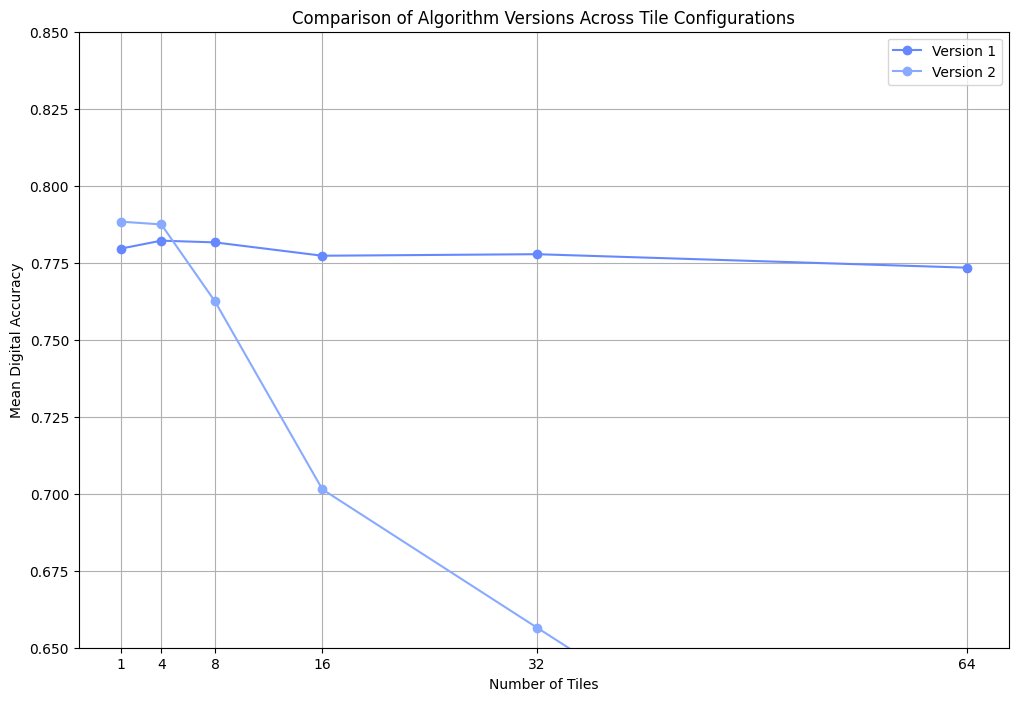

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_v1 = pd.read_csv('agad_v1.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v1['digital_accuracies'] = df_v1['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_v2 = pd.read_csv('agad_v2_new.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v2['digital_accuracies'] = df_v2['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)


# Calculate the mean digital accuracies for each tile configuration discarting outliers
mean_accuracies_v1 = df_v1['digital_accuracies'].apply(lambda x: np.mean([acc for acc in x if acc > 0.4]))
mean_accuracies_v2 = df_v2['digital_accuracies'].apply(lambda x: np.mean([acc for acc in x if acc > 0.4]))

# Extract the tile configurations
tile_configurations = df_v1['num_tiles']

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(tile_configurations, mean_accuracies_v1, label='Version 1', marker='o', color='#6688FF')
plt.plot(tile_configurations, mean_accuracies_v2, label='Version 2', marker='o', color='#88AAFF')
plt.xlabel('Number of Tiles')
plt.ylabel('Mean Digital Accuracy')
# Set y-axis limits
plt.ylim(0.65, 0.85)
plt.xticks([1, 4, 8, 16, 32, 64])
plt.title('Comparison of Algorithm Versions Across Tile Configurations')
plt.legend()
plt.grid(True)
plt.show()

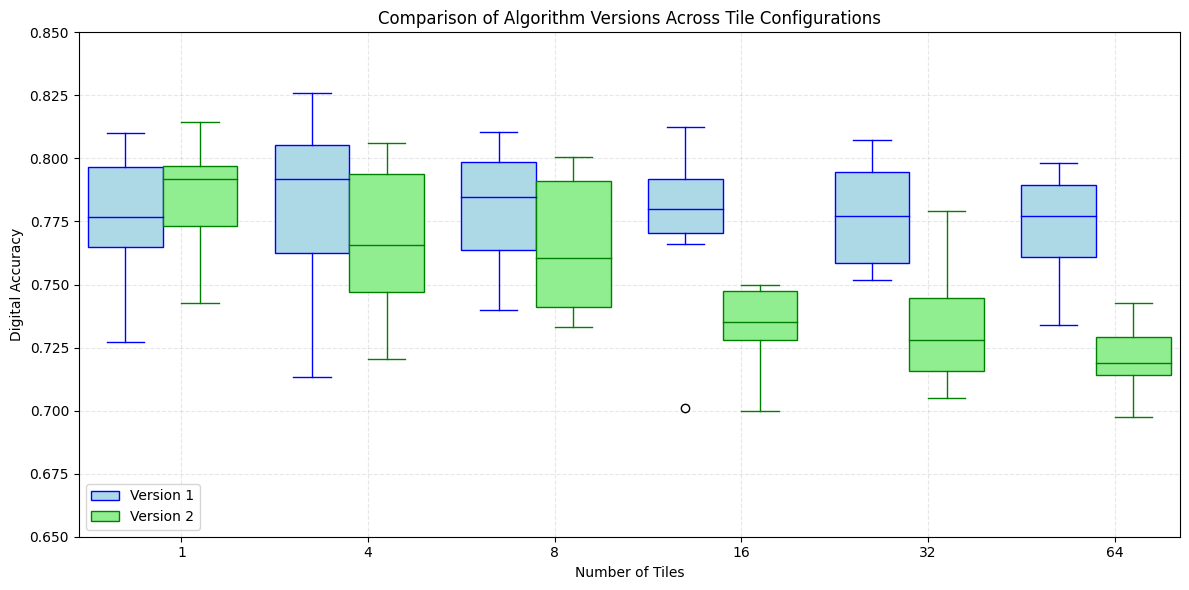

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_v1 = pd.read_csv('agad_v1.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v1['digital_accuracies'] = df_v1['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

df_v2 = pd.read_csv('agad_v2.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v2['digital_accuracies'] = df_v2['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract the tile configurations
tile_configurations = sorted(df_v1['num_tiles'].unique())

plt.figure(figsize=(12, 6))

# Calculate positions for the box plots
positions = np.arange(len(tile_configurations)) * 2.0
width = 0.8

# Create color map
colors = ['blue', 'green']
lightcolors = ['lightblue', 'lightgreen']
boxes = []  # Store the boxes for legend

# Create a different colored box plot for each version
for i, (df, color, lightcolor) in enumerate(zip([df_v1, df_v2], colors, lightcolors)):
    # Prepare data for boxplot
    data = [df[df['num_tiles'] == config]['digital_accuracies'].explode().dropna().tolist() for config in tile_configurations]
    
    # Create box plot
    bp = plt.boxplot(data, 
                     positions=positions + i*width - (1-width/2),
                     widths=width,
                     patch_artist=True,
                     boxprops=dict(facecolor=lightcolor, color=color),
                     medianprops=dict(color=color),
                     whiskerprops=dict(color=color),
                     capprops=dict(color=color))
    
    # Store the first box of this color for the legend
    boxes.append(bp['boxes'][0])

# Customize the plot
plt.xlabel('Number of Tiles')
plt.ylabel('Digital Accuracy')
plt.title('Comparison of Algorithm Versions Across Tile Configurations')
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks to tile configurations
plt.xticks(positions, tile_configurations)
plt.ylim(0.65, 0.85)

# Add legend manually
plt.legend(boxes, ['Version 1', 'Version 2'], loc='lower left')

plt.tight_layout()
plt.show()